### Customer segmentation models are often used for dividing a company’s clients into different user groups. Customers in each group display shared characteristics that distinguish them from other users. This project shows how companies use data segmentation to drive sales.
### In this project, a data segmentation model in Python is built using a K-Means algorithm. It also looks at how RFM is used in marketing to analyze customer value and explore other metrics for evaluating the performance of a clustering algorithm. Finally, it answers the question of how to visualize and interpret clusters for customer segmentation.
### The dataset consists of 8 variables:
### InvoiceNo: The unique identifier of each customer invoice.
### StockCode: The unique identifier of each item in stock.
### Description: The item purchased by the customer.
### Quantity: The number of each item purchased by a customer in a single invoice.
### InvoiceDate: The purchase date.
### UnitPrice: Price of one unit of each item.
### CustomerID: Unique identifier assigned to each user.
### Country: The country from where the purchase was made.

### Problem Statement
### To increase customer lifetime value by segmenting the customers into several groups with similar characteristics and form growth strategies for each group.

### Analysis Process
### Understanding The Segmentation Data
### Preprocessing Data for Segmentation
### Building The Customer Segmentation Model
### Segmentation Model Interpretation and Visualization


In [2]:
import pandas as pd
import numpy as np
import operator as op
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## importing the libraries

In [3]:
## Understand the Segmentation Data by loading it
df = pd.read_csv("C:\\Users\\selorm hodo\\Downloads\\Online _Retail_sql.csv", encoding ='latin1')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


### Preprocessing Data for Segmentation
### The raw data  downloaded is complex and in a format that cannot be easily ingested by customer segmentation models, we need to do some preliminary data preparation to make this data interpretable.

### The informative features in this dataset that tell us about customer buying behavior include “Quantity”, “InvoiceDate” and “UnitPrice.” Using these variables, we are going to derive a customer’s RFM profile - Recency, Frequency, Monetary Value.

### RFM is commonly used in marketing to evaluate a client’s value based on their:

### Recency: How recently have they made a purchase?
### Frequency: How often have they bought something?
### Monetary Value: How much money do they spend on average when making purchases?
### With the variables in this e-commerce transaction dataset, we will calculate each customer’s recency, frequency, and monetary value. These RFM values will then be used to build the segmentation model.

In [5]:
##Recency
##Let’s start by calculating recency. To identify a customer’s recency, we need to pinpoint when each user was last seen making a purchase:
# convert date column to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate'])
# keep only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]

In [6]:
##we only kept rows with the most recent date for each customer. We now need to rank every customer based on what time they last bought something and assign a recency score to them
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

C:\Users\Selorm Hodo\AppData\Local\Temp\ipykernel_24548\2035603413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [9]:
df_rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-12 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-12 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-12 08:26:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-09-12 12:16:00,1.25,12713.0,Germany,2011-09-12 12:16:00,1,608
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-09-12 12:16:00,0.85,12713.0,Germany,2011-09-12 12:16:00,1,608
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-09-12 12:16:00,0.85,12713.0,Germany,2011-09-12 12:16:00,1,608
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-09-12 12:16:00,2.08,12713.0,Germany,2011-09-12 12:16:00,1,608


In [12]:
## Frequency
## Now, let’s calculate frequency — how many times has each customer made a purchase on the platform:
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']
rec_freq = df_freq.merge(df_rec,on='CustomerID')
rec_freq

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,2011-01-18 10:01:00,1,371
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-07-12 14:57:00,2.10,Iceland,2010-07-12 14:57:00,1,181
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-07-12 14:57:00,4.25,Iceland,2010-07-12 14:57:00,1,181
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-07-12 14:57:00,3.25,Iceland,2010-07-12 14:57:00,1,181
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,2010-07-12 14:57:00,0.65,Iceland,2010-07-12 14:57:00,1,181
...,...,...,...,...,...,...,...,...,...,...,...,...
92586,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,36,2011-05-22 10:39:00,1.65,United Kingdom,2011-05-22 10:39:00,1,495
92587,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,2011-05-22 10:39:00,1.45,United Kingdom,2011-05-22 10:39:00,1,495
92588,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,12,2011-05-22 10:39:00,1.65,United Kingdom,2011-05-22 10:39:00,1,495
92589,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,2011-05-22 10:39:00,1.65,United Kingdom,2011-05-22 10:39:00,1,495


In [13]:
## Monetary Value
## Finally, we can calculate each user’s monetary value to understand the total amount they have spent on the platform.
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']
rfm = m.merge(rec_freq,on='CustomerID')
rfm

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total
0,12346.0,189248.25,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,2011-01-18 10:01:00,1,371,189248.25
1,12347.0,1246.73,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-07-12 14:57:00,2.10,Iceland,2010-07-12 14:57:00,1,181,40.68
2,12347.0,1246.73,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-07-12 14:57:00,4.25,Iceland,2010-07-12 14:57:00,1,181,11.00
3,12347.0,1246.73,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-07-12 14:57:00,3.25,Iceland,2010-07-12 14:57:00,1,181,40.68
4,12347.0,1246.73,31,537626,22492,MINI PAINT SET VINTAGE,36,2010-07-12 14:57:00,0.65,Iceland,2010-07-12 14:57:00,1,181,122.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92586,18287.0,3291.38,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,36,2011-05-22 10:39:00,1.65,United Kingdom,2011-05-22 10:39:00,1,495,148.68
92587,18287.0,3291.38,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,2011-05-22 10:39:00,1.45,United Kingdom,2011-05-22 10:39:00,1,495,147.60
92588,18287.0,3291.38,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,12,2011-05-22 10:39:00,1.65,United Kingdom,2011-05-22 10:39:00,1,495,29.52
92589,18287.0,3291.38,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,2011-05-22 10:39:00,1.65,United Kingdom,2011-05-22 10:39:00,1,495,149.52


## Now, let’s select only the columns required to build the customer segmentation model:

In [14]:
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]

In [15]:
finaldf

,CustomerID,recency,frequency,monetary_value
0,12346.0,371,1,189248.25
1,12347.0,181,31,1246.73
2,12347.0,181,31,1246.73
3,12347.0,181,31,1246.73
4,12347.0,181,31,1246.73
...,...,...,...,...
92586,18287.0,495,29,3291.38
92587,18287.0,495,29,3291.38
92588,18287.0,495,29,3291.38
92589,18287.0,495,29,3291.38


## Removing Outliers
### We have successfully derived three meaningful variables from the raw, uninterpretable transaction data we started out with.

### Before building the customer segmentation model, we first need to check the dataframe for outliers and remove them.

### To get a visual representation of outliers in the dataframe, let’s create a boxplot of each variable:

recency: 


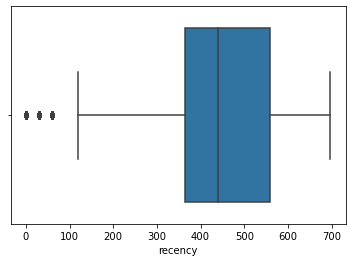

frequency: 


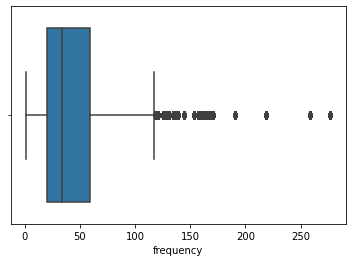

monetary_value: 


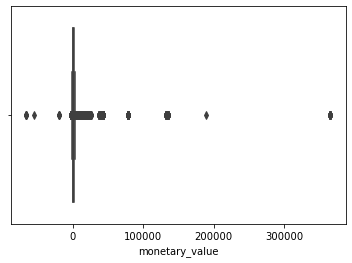

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

### Observe that “recency” is the only variable with no visible outliers. “Frequency” and “monetary_value”, on the other hand, have many outliers that must be removed before we proceed to build the model.

### To identify outliers, we will compute a measurement called a Z-Score. Z-Scores tell us how far away from the mean a data point is. A Z-Score of 3, for instance, means that a value is 3 standard deviations away from the variable’s mean.

In [17]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [18]:
new_df

,recency,frequency,monetary_value
1,181,31,1246.73
2,181,31,1246.73
3,181,31,1246.73
4,181,31,1246.73
5,181,31,1246.73
...,...,...,...
92586,495,29,3291.38
92587,495,29,3291.38
92588,495,29,3291.38
92589,495,29,3291.38


In [19]:
### Standardization
### The final pre-processing technique we will apply to the dataset is standardization.
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features

,recency,frequency,monetary_value
0,-1.504098,0.485807,0.314260
1,-0.537207,-0.181053,2.523951
2,1.556697,2.486389,0.582494
3,-0.241597,-0.181053,-0.185672
4,-0.426354,-0.752648,-0.304001
...,...,...,...
4337,0.688343,-0.514484,-0.491263
4338,1.649075,-0.657382,-0.511628
4339,-0.180012,-0.752648,-0.541257
4340,-0.303183,1.152668,-0.449594


## Building The Customer Segmentation Model
### As mentioned above, we are going to create a K-Means clustering algorithm to perform customer segmentation.

## The goal of a K-Means clustering model is to segment all the data available into non-overlapping sub-groups that are distinctfrom each other.
## When building a clustering model, we need to decide how many segments we want to group the data into. This is achieved by a heuristic called the elbow method.

## We will create a loop and run the K-Means algorithm from 1 to 10 clusters. Then, we can plot model results for this range of values and select the elbow of the curve as the number of clusters to use.

Text(0, 0.5, 'Inertia')

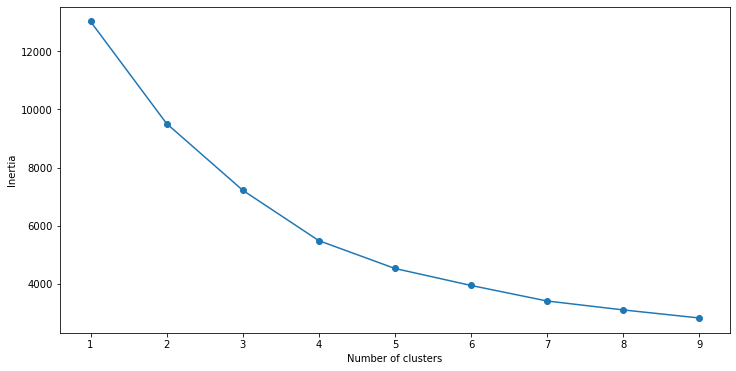

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [22]:
## The “elbow” of this graph is the point of inflection on the curve, and in this case is at the 4-cluster mark. 

## This means that the optimal number of clusters to use in this K-Means algorithm is 4. Let’s now build the model with 4 clusters:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++', random_state = 42)
kmeans.fit(scaled_features)

KMeans(n_clusters=4, random_state=42)

In [23]:
## To evaluate the performance of this model, we will use a metric called the silhouette score. This is a coefficient value that ranges from -1 to +1. A higher silhouette score is indicative of a better model.
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.41877207339271816


## The silhouette coefficient of this model is 0.42, indicating reasonable cluster separation.

## Segmentation Model Interpretation and Visualization

In [26]:
## Now that we have built our segmentation model, we need to assign clusters to each customer in the dataset:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
new_df

,recency,frequency,monetary_value,cluster
1,181,31,1246.73,0
32,338,17,4311.90,2
49,678,73,1618.81,3
122,386,17,553.25,1
139,356,5,389.11,1
...,...,...,...,...
92495,537,10,129.35,1
92505,693,7,101.10,1
92512,396,5,60.00,1
92517,376,45,187.15,3


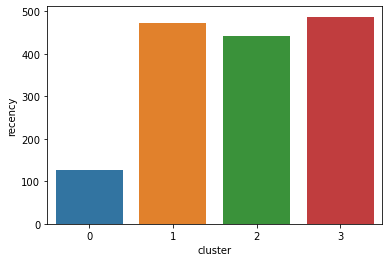

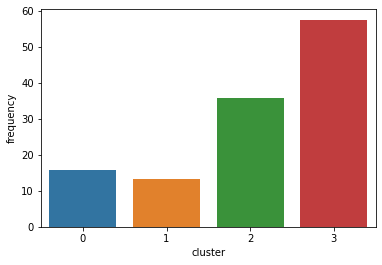

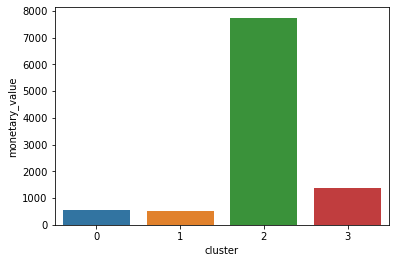

In [28]:
 ## visualise data to identify the distinct traits of customers in each segment:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

## Looking at the charts above, we can identify the following attributes of customers in each segment:

## Cluster 0:
## Customers in this segment have low recency, frequency, and monetary value scores. These are people who make occasional purchases and are likely to visit the platform only when they have a specific product they’d like to buy.

## Cluster 1:
## These customers are seen making purchases often and have visited the platform recently. Their monetary value is extremely low and  low freqency, indicating that they spend less when shopping.This could mean that users in this segment are not likely to make multiple purchases in a single order and are not highly responsive to cross-selling and up-selling. Resellers who purchase products in bulk could also be part of this segment. They have the potential to become long-term consumers with high frequency and monetary value and should be targeted with special “new-user promotions” to instill brand loyalty.

## Cluster 2:
## These customers are seen making purchases often and have visited the platform recently. Their monetary value is extremely high, indicating that they spend a lot when shopping online.This could mean that users in this segment are likely to make multiple purchases in a single order and are highly responsive to cross-selling and up-selling. Resellers who purchase products in bulk could also be part of this segment.

## Cluster 3:
## These customers are seen making purchases often and have visited the platform recently. Their monetary value is low, indicating that they spend a lot when shopping. They have the potential to become long-term consumers with high  monetary value and should be targeted with special “new-user promotions” to instill brand loyalty.